# Valtteri Bottas
<img src="https://www.formula1.com/content/fom-website/en/drivers/valtteri-bottas/_jcr_content/image.img.1920.medium.jpg/1646819266274.jpg" width="300">

### Team: Alfa Romeo
<img src ="https://www.formula1.com/content/fom-website/en/drivers/valtteri-bottas/_jcr_content/helmet.img.png/1646824626429.png" width="200">


In [ ]:
library (tidyverse)
library (tidymodels)
source("master_functions.r")
set.seed(620)

In [ ]:
initialize_master()

### THIS CODE CAN BE APPLIED TO ALL DRIVER'S

In [7]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

bot_laps <- lap_data %>%
            filter(driverId == 822)

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1046,87
883,57
902,57
929,57
971,57
990,57
1011,57
1045,57
949,56


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          lap  
   114764.0       -544.3  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.583811e+04
rsq,standard,6.608865e-02
mae,standard,1.088432e+04


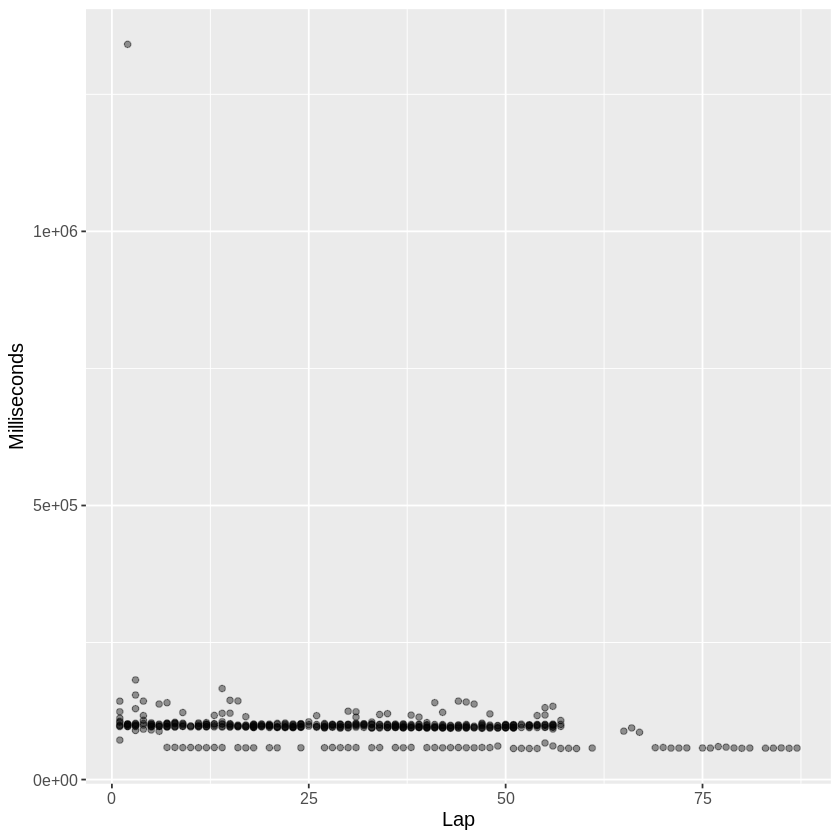

In [8]:
### WE COULD USE SOURCE FUNCTION TO TRIM THE RACE CODE TOO. ANYTHING THAT IS NOT UNIQUE. 

#1. Bahrain 

vb_bahrain <- bot_laps %>%
                filter(raceId %in% bahrain_race_ID) 

vb_bahrain_clean <- vb_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
vb_bahrain_clean
vb_bahrain_clean_ID <- vb_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_bahrain_races <- bot_laps %>%
                    filter(raceId %in% vb_bahrain_clean_ID)

vb_bahrain_split <- initial_split(vb_bahrain_races, prop = 0.75, strata = milliseconds)

vb_bahrain_train <- training(vb_bahrain_split)

vb_bahrain_test <- testing(vb_bahrain_split) 

### LINEAR REGRESSION 

vb_bahrain_spec <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

vb_bahrain_recipe <- recipe(milliseconds ~ lap, data = vb_bahrain_train)

vb_bahrain_fit <- workflow() %>%
  add_recipe(vb_bahrain_recipe) %>%
  add_model(vb_bahrain_spec) %>%
  fit(data = vb_bahrain_train)

vb_bahrain_fit

vb_bahrain_test_results <- vb_bahrain_fit %>%
  predict(vb_bahrain_test) %>%
  bind_cols(vb_bahrain_test) %>%
  metrics(truth = milliseconds, estimate = .pred)
vb_bahrain_test_results

vb_bahrain_plot_final <- ggplot(vb_bahrain_train, aes(x = lap, y = milliseconds)) +
  geom_point(alpha = 0.4) +
  xlab("Lap") +
  ylab("Milliseconds") +
  theme(text = element_text(size = 12))
vb_bahrain_plot_final

### USING DATA

# vb_bahrain_lap_times <- vb_bahrain_train %>%
#                         group_by(lap) %>%
#                         summarize(lap_time_avg = mean(milliseconds)) 
                        

# vb_bahrain_avg_race_time <- vb_bahrain_lap_times %>%
#                             mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
#                             select(lap_time_avg_mins) %>%
#                             map(sum) 

In [9]:
#2. Saudi Arabia

vb_saudi <- bot_laps %>%
                filter(raceId %in% saudi_race_ID) 

vb_saudi_clean <- vb_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_saudi_clean
vb_saudi_clean_ID <- vb_saudi_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_saudi_races <- bot_laps %>%
                    filter(raceId %in% vb_saudi_clean_ID)

vb_saudi_split <- initial_split(vb_saudi_races, prop = 0.75, strata = milliseconds)

vb_saudi_train <- training(vb_saudi_split)

vb_saudi_test <- testing(vb_saudi_split) 


### USING DATA

vb_saudi_lap_times <- vb_saudi_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_saudi_avg_race_time <- vb_saudi_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum)

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1072,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`summarise()` ungrouping output (override with `.groups` argument)



In [10]:
#3. Australia

vb_aus <- bot_laps %>%
                filter(raceId %in% aus_race_ID) 

vb_aus_clean <- vb_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_aus_clean
vb_aus_clean_ID <- vb_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_aus_races <- bot_laps %>%
                    filter(raceId %in% vb_aus_clean_ID)

vb_aus_split <- initial_split(vb_aus_races, prop = 0.75, strata = milliseconds)

vb_aus_train <- training(vb_aus_split)

vb_aus_test <- testing(vb_aus_split) 


### USING DATA

vb_aus_lap_times <- vb_aus_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_aus_avg_race_time <- vb_aus_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
989,58
1010,58
880,57
900,57
948,57
969,57


`summarise()` ungrouping output (override with `.groups` argument)



In [11]:
#4. Italy, Imola

vb_imola <- bot_laps %>%
                filter(raceId %in% imola_race_ID) 

vb_imola_clean <- vb_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_imola_clean
vb_imola_clean_ID <- vb_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_imola_races <- bot_laps %>%
                    filter(raceId %in% vb_imola_clean_ID)

vb_imola_split <- initial_split(vb_imola_races, prop = 0.75, strata = milliseconds)

vb_imola_train <- training(vb_imola_split)

vb_imola_test <- testing(vb_imola_split) 


### USING DATA

vb_imola_lap_times <- vb_imola_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_imola_avg_race_time <- vb_imola_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,30


`summarise()` ungrouping output (override with `.groups` argument)



In [12]:
#5. Spain

vb_spain <- bot_laps %>%
                filter(raceId %in% spain_race_ID) 

vb_spain_clean <- vb_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_spain_clean
vb_spain_clean_ID <- vb_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_spain_races <- bot_laps %>%
                    filter(raceId %in% vb_spain_clean_ID)

vb_spain_split <- initial_split(vb_spain_races, prop = 0.75, strata = milliseconds)

vb_spain_train <- training(vb_spain_split)

vb_spain_test <- testing(vb_spain_split) 


### USING DATA

vb_spain_lap_times <- vb_spain_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_spain_avg_race_time <- vb_spain_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
904,66
930,66
952,66
993,66
1014,66
1036,66
1055,66
884,65
973,38


`summarise()` ungrouping output (override with `.groups` argument)



In [13]:
#6. Monaco

vb_monaco <- bot_laps %>%
                filter(raceId %in% monaco_race_ID) 

vb_monaco_clean <- vb_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_monaco_clean
vb_monaco_clean_ID <- vb_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_monaco_races <- bot_laps %>%
                    filter(raceId %in% vb_monaco_clean_ID)

vb_monaco_split <- initial_split(vb_monaco_races, prop = 0.75, strata = milliseconds)

vb_monaco_train <- training(vb_monaco_split)

vb_monaco_test <- testing(vb_monaco_split) 


### USING DATA

vb_monaco_lap_times <- vb_monaco_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_monaco_avg_race_time <- vb_monaco_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
885,78
931,78
974,78
994,78
1015,78
953,77
905,55
1056,29


`summarise()` ungrouping output (override with `.groups` argument)



In [14]:
#7. Azerbaijan

vb_azerbaijan <- bot_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

vb_azerbaijan_clean <- vb_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_azerbaijan_clean
vb_azerbaijan_clean_ID <- vb_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_azerbaijan_races <- bot_laps %>%
                    filter(raceId %in% vb_azerbaijan_clean_ID)

vb_azerbaijan_split <- initial_split(vb_azerbaijan_races, prop = 0.75, strata = milliseconds)

vb_azerbaijan_train <- training(vb_azerbaijan_split)

vb_azerbaijan_test <- testing(vb_azerbaijan_split) 


### USING DATA

vb_azerbaijan_lap_times <- vb_azerbaijan_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_azerbaijan_avg_race_time <- vb_azerbaijan_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
955,51
976,51
1013,51
1057,51
992,48


`summarise()` ungrouping output (override with `.groups` argument)



In [15]:
#8. Canada

vb_canada <- bot_laps %>%
                filter(raceId %in% canada_race_ID) 

vb_canada_clean <- vb_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_canada_clean
vb_canada_clean_ID <- vb_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_canada_races <- bot_laps %>%
                    filter(raceId %in% vb_canada_clean_ID)

vb_canada_split <- initial_split(vb_canada_races, prop = 0.75, strata = milliseconds)

vb_canada_train <- training(vb_canada_split)

vb_canada_test <- testing(vb_canada_split) 


### USING DATA

vb_canada_lap_times <- vb_canada_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_canada_avg_race_time <- vb_canada_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
906,70
932,70
954,70
975,70
1016,70
886,69
995,68


`summarise()` ungrouping output (override with `.groups` argument)



In [16]:
#9. Great Britain

vb_uk <- bot_laps %>%
                filter(raceId %in% uk_race_ID) 

vb_uk_clean <- vb_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_uk_clean
vb_uk_clean_ID <- vb_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_uk_races <- bot_laps %>%
                    filter(raceId %in% vb_uk_clean_ID)

vb_uk_split <- initial_split(vb_uk_races, prop = 0.75, strata = milliseconds)

vb_uk_train <- training(vb_uk_split)

vb_uk_test <- testing(vb_uk_split) 


### USING DATA

vb_uk_lap_times <- vb_uk_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_uk_avg_race_time <- vb_uk_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
887,52
908,52
934,52
998,52
1019,52
1034,52
1035,52
1061,52
957,51


`summarise()` ungrouping output (override with `.groups` argument)



In [17]:
#10. Austria

vb_austria <- bot_laps %>%
                filter(raceId %in% austria_race_ID) 

vb_austria_clean <- vb_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_austria_clean
vb_austria_clean_ID <- vb_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_austria_races <- bot_laps %>%
                    filter(raceId %in% vb_austria_clean_ID)

vb_austria_split <- initial_split(vb_austria_races, prop = 0.75, strata = milliseconds)

vb_austria_train <- training(vb_austria_split)

vb_austria_test <- testing(vb_austria_split) 


### USING DATA

vb_austria_lap_times <- vb_austria_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_austria_avg_race_time <- vb_austria_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
907,71
933,71
977,71
1018,71
1031,71
1032,71
1058,71
1060,71
956,70


`summarise()` ungrouping output (override with `.groups` argument)



In [18]:
#11. France

vb_france <- bot_laps %>%
                filter(raceId %in% france_race_ID) 

vb_france_clean <- vb_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_france_clean
vb_france_clean_ID <- vb_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_france_races <- bot_laps %>%
                    filter(raceId %in% vb_france_clean_ID)

vb_france_split <- initial_split(vb_france_races, prop = 0.75, strata = milliseconds)

vb_france_train <- training(vb_france_split)

vb_france_test <- testing(vb_france_split) 


### USING DATA

vb_france_lap_times <- vb_france_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_france_avg_race_time <- vb_france_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum)

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,53
1017,53
1059,53


`summarise()` ungrouping output (override with `.groups` argument)



In [19]:
#12. Hungary

vb_hungary <- bot_laps %>%
                filter(raceId %in% hungary_race_ID) 

vb_hungary_clean <- vb_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                    
vb_hungary_clean
vb_hungary_clean_ID <- vb_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_hungary_races <- bot_laps %>%
                    filter(raceId %in% vb_hungary_clean_ID)

vb_hungary_split <- initial_split(vb_hungary_races, prop = 0.75, strata = milliseconds)

vb_hungary_train <- training(vb_hungary_split)

vb_hungary_test <- testing(vb_hungary_split) 


### USING DATA

vb_hungary_lap_times <- vb_hungary_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_hungary_avg_race_time <- vb_hungary_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
910,70
979,70
1000,70
1033,70
936,69
958,69
1021,69
890,42


`summarise()` ungrouping output (override with `.groups` argument)



In [20]:
#13. Belgium

vb_belgium <- bot_laps %>%
                filter(raceId %in% belgium_race_ID) 

vb_belgium_clean <- vb_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_belgium_clean
vb_belgium_clean_ID <- vb_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_belgium_races <- bot_laps %>%
                    filter(raceId %in% vb_belgium_clean_ID)

vb_belgium_split <- initial_split(vb_belgium_races, prop = 0.75, strata = milliseconds)

vb_belgium_train <- training(vb_belgium_split)

vb_belgium_test <- testing(vb_belgium_split) 


### USING DATA

vb_belgium_lap_times <- vb_belgium_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_belgium_avg_race_time <- vb_belgium_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
891,44
911,44
960,44
980,44
1001,44
1022,44
1037,44
937,43
1063,1


`summarise()` ungrouping output (override with `.groups` argument)



In [21]:
#14. Netherlands

vb_netherlands <- bot_laps %>%
                filter(raceId %in% netherlands_race_ID) 

vb_netherlands_clean <- vb_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_netherlands_clean
vb_netherlands_clean_ID <- vb_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_netherlands_races <- bot_laps %>%
                    filter(raceId %in% vb_netherlands_clean_ID)

vb_netherlands_split <- initial_split(vb_netherlands_races, prop = 0.75, strata = milliseconds)

vb_netherlands_train <- training(vb_netherlands_split)

vb_netherlands_test <- testing(vb_netherlands_split) 


### USING DATA

vb_netherlands_lap_times <- vb_netherlands_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_netherlands_avg_race_time <- vb_netherlands_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,72


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`summarise()` ungrouping output (override with `.groups` argument)



In [22]:
#15. Italy, Monza

vb_monza <- bot_laps %>%
                filter(raceId %in% monza_race_ID) 

vb_monza_clean <- vb_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
vb_monza_clean
vb_monza_clean_ID <- vb_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_monza_races <- bot_laps %>%
                    filter(raceId %in% vb_monza_clean_ID)

vb_monza_split <- initial_split(vb_monza_races, prop = 0.75, strata = milliseconds)

vb_monza_train <- training(vb_monza_split)

vb_monza_test <- testing(vb_monza_split) 


### USING DATA

vb_monza_lap_times <- vb_monza_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_monza_avg_race_time <- vb_monza_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
892,53
912,53
938,53
961,53
981,53
1002,53
1023,53
1038,53
1065,53


`summarise()` ungrouping output (override with `.groups` argument)



In [23]:
#16. Singapore

vb_singapore <- bot_laps %>%
                filter(raceId %in% singapore_race_ID) 

vb_singapore_clean <- vb_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_singapore_clean
vb_singapore_clean_ID <- vb_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_singapore_races <- bot_laps %>%
                    filter(raceId %in% vb_singapore_clean_ID)

vb_singapore_split <- initial_split(vb_singapore_races, prop = 0.75, strata = milliseconds)

vb_singapore_train <- training(vb_singapore_split)

vb_singapore_test <- testing(vb_singapore_split) 


### USING DATA

vb_singapore_lap_times <- vb_singapore_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_singapore_avg_race_time <- vb_singapore_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
893,61
939,61
1003,61
1024,61
913,60
982,58
962,35


`summarise()` ungrouping output (override with `.groups` argument)



In [24]:
#17. Japan

vb_japan <- bot_laps %>%
                filter(raceId %in% japan_race_ID) 

vb_japan_clean <- vb_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_japan_clean
vb_japan_clean_ID <- vb_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_japan_races <- bot_laps %>%
                    filter(raceId %in% vb_japan_clean_ID)

vb_japan_split <- initial_split(vb_japan_races, prop = 0.75, strata = milliseconds)

vb_japan_train <- training(vb_japan_split)

vb_japan_test <- testing(vb_japan_split) 


### USING DATA

vb_japan_lap_times <- vb_japan_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_japan_avg_race_time <- vb_japan_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
940,53
964,53
984,53
1005,53
895,52
1026,52
914,44


`summarise()` ungrouping output (override with `.groups` argument)



In [25]:
#18. USA, Austin

vb_austin <- bot_laps %>%
                filter(raceId %in% austin_race_ID) 

vb_austin_clean <- vb_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_austin_clean
vb_austin_clean_ID <- vb_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_austin_races <- bot_laps %>%
                    filter(raceId %in% vb_austin_clean_ID)

vb_austin_split <- initial_split(vb_austin_races, prop = 0.75, strata = milliseconds)

vb_austin_train <- training(vb_austin_split)

vb_austin_test <- testing(vb_austin_split) 


### USING DATA

vb_austin_lap_times <- vb_austin_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_austin_avg_race_time <- vb_austin_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
898,56
916,56
985,56
1006,56
1028,56
1069,56
965,55
942,5


`summarise()` ungrouping output (override with `.groups` argument)



In [26]:
#19. Mexico

vb_mexico <- bot_laps %>%
                filter(raceId %in% mexico_race_ID) 

vb_mexico_clean <- vb_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_mexico_clean
vb_mexico_clean_ID <- vb_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_mexico_races <- bot_laps %>%
                    filter(raceId %in% vb_mexico_clean_ID)

vb_mexico_split <- initial_split(vb_mexico_races, prop = 0.75, strata = milliseconds)

vb_mexico_train <- training(vb_mexico_split)

vb_mexico_test <- testing(vb_mexico_split) 


### USING DATA

vb_mexico_lap_times <- vb_mexico_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_mexico_avg_race_time <- vb_mexico_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
943,71
966,71
986,71
1027,71
1007,70
1070,69


`summarise()` ungrouping output (override with `.groups` argument)



In [27]:
#20. Brazil

vb_brazil <- bot_laps %>%
                filter(raceId %in% brazil_race_ID) 

vb_brazil_clean <- vb_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_brazil_clean
vb_brazil_clean_ID <- vb_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_brazil_races <- bot_laps %>%
                    filter(raceId %in% vb_brazil_clean_ID)

vb_brazil_split <- initial_split(vb_brazil_races, prop = 0.75, strata = milliseconds)

vb_brazil_train <- training(vb_brazil_split)

vb_brazil_test <- testing(vb_brazil_split) 


### USING DATA

vb_brazil_lap_times <- vb_brazil_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_brazil_avg_race_time <- vb_brazil_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
967,71
987,71
1008,71
1071,71
917,70
944,70
1029,51
899,45


`summarise()` ungrouping output (override with `.groups` argument)



In [28]:
#21. Abu Dhabi

vb_uae <- bot_laps %>%
                filter(raceId %in% uae_race_ID) 

vb_uae_clean <- vb_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_uae_clean
vb_uae_clean_ID <- vb_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_uae_races <- bot_laps %>%
                    filter(raceId %in% vb_uae_clean_ID)

vb_uae_split <- initial_split(vb_uae_races, prop = 0.75, strata = milliseconds)

vb_uae_train <- training(vb_uae_split)

vb_uae_test <- testing(vb_uae_split) 


### USING DATA

vb_uae_lap_times <- vb_uae_train %>%
                        group_by(lap) %>%
                        summarize(lap_time_avg = mean(milliseconds)) 
                        

vb_uae_avg_race_time <- vb_uae_lap_times %>%
                            mutate(lap_time_avg_mins = lap_time_avg / 60000) %>%
                            select(lap_time_avg_mins) %>%
                            map(sum) 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1073,58
918,55
988,55
1009,55
1030,55
1047,55
897,54
945,54
968,6


`summarise()` ungrouping output (override with `.groups` argument)

